In [1]:
# libraries importieren
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
sns.set_theme()

Bar Chart: Einwohner in ausgewählter Europäischen Ländern im Jahr 2007

* Als erstes wollen wir die Daten laden und anzeigen.
* Wir sehen einen DataFrame mit dem Inhalt der Datei

In [2]:
gdp = pd.read_csv('../data/gapminder_2007.csv')
gdp

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Austria,Europe,2007,79.829,8199783,36126.49270,AUT,40
1,France,Europe,2007,80.657,61083916,30470.01670,FRA,250
2,Germany,Europe,2007,79.406,82400996,32170.37442,DEU,276
3,Italy,Europe,2007,80.546,58147733,28569.71970,ITA,380
4,Switzerland,Europe,2007,81.701,7554661,37506.41907,CHE,756


Erstelle als nächstes einen Barchart, der die Bevölkerungsgrösse (pop) pro Land (country) zeigt.

<Axes: xlabel='country'>

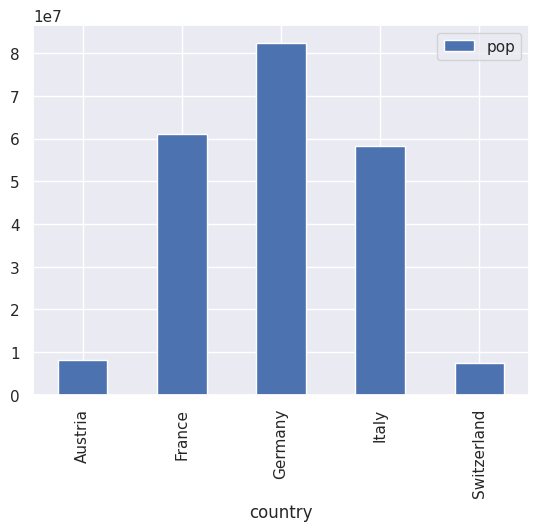

In [20]:
gdp.plot.bar(x='country', y='pop')

* Erstelle den Bar Chart erneut (gleicher Code).
* Füge einen Titel hinzu.
* Setze die Beschriftung der X-Achse auf waagerechte Orientierung (rotation=0).
* Setze die Beschriftung der Y-Achse auf den Format-Stil "plain". Verwende dazu die Funktion `plt.ticklabel_format(axis='y', style='plain')`

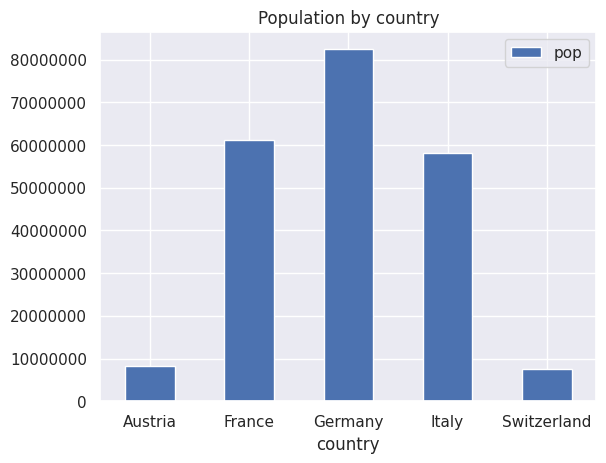

In [64]:
gdp.plot.bar(x='country', y='pop')
plt.title('Population by country')
plt.xticks(rotation=0)
plt.show()

* Erstelle den gleichen Chart noch einmal (gleicher Code wie vorhiger Schritt)
* Ändere den Code so, dass er die Funktion `.plot.barh` verwendet. Was macht das?
* Setze die Rotation der Achsenskalierung auf einen sinnvollen Wert (z.B. 90, 45)

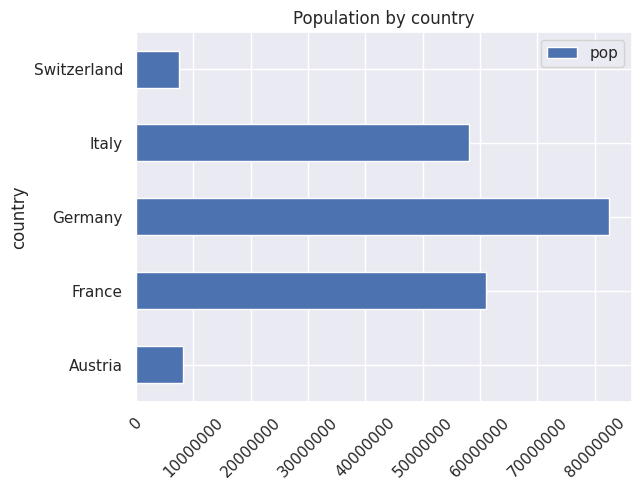

In [69]:
gdp.plot.barh(x='country', y='pop')
plt.title('Population by country')
plt.ticklabel_format(axis='x', style='plain')
plt.xticks(rotation=45)
plt.show()

* Erstelle nun einen Pie-Plot, um die Anteile der Bevölkerung der Länder zu zeigen
* Setze einen Titel und zeige die Legene an. Die Legende ist wahrscheinlich unglücklich platziert. Setze sie oben links und verkleinere die Schrift (Parameter `fontsize=6, loc='upper left'`)
* Dazu müssen wir den `gdp` DataFrame mit einem Index auf die Spalte 'country' versehen: `gdp.set_index(...)`
* Um den % Anteil pro Land innerhalb des Pie-Charts anzuzeigen, verwende bei der Funktion `plot.pie()` den Parameter `autopct='%.2f'`
* Um die % Anteile im Pie Chart kleiner und in weisser Farbe darzustellen, füge den Parameter `{'fontsize': 8, 'color': 'white'}` hinzu

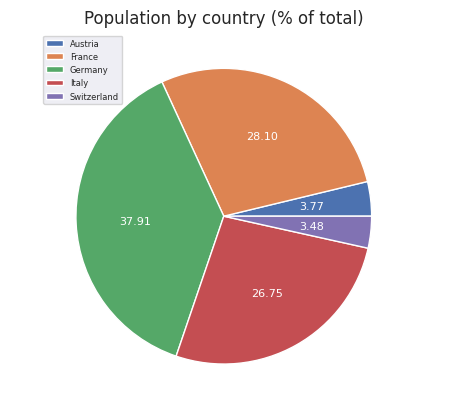

In [78]:
dfx = gdp.set_index('country')
dfx.plot.pie(y='pop', 
             autopct='%.2f', 
             textprops={'fontsize': 8,
                        'color': 'white'})
plt.legend(fontsize=6, loc='upper left')
plt.title('Population by country (% of total)')
plt.ylabel('') 
plt.show()

Lese nun das Dataset ein, um die Wachstumsgrafik zu erstellen.

In [72]:
growth = pd.read_csv('../data/gapminder_growth.csv')
growth.head()

,country,year,pop,gdpPercap
0,Austria,1952,1.000000,1.000000
1,Austria,1957,1.005498,1.440849
2,Austria,1962,1.023544,1.215788
3,Austria,1967,1.034662,1.193836
4,Austria,1972,1.022665,1.298180


* Um einen Lineplot zu erzeugen, benötigen wir die Daten im Wide Format.
* Folgendes Script erzeugt einen Pivot-Chart, sodass jede Zeile ein Jahr, jede Spalte ein Land abbildet
* Hier findest Du eine Erklärung zur Funktion `pivot_table()` (vor allem die Grafik ist hilfreich): https://pandas.pydata.org/docs/user_guide/reshaping.html#pivot-and-pivot-table
* Für den Moment reicht es aus zu wissen, dass wir damit von einem Long-Format (jede Zeile ein Wert) in ein Wide-Format wechseln (jede Zeile mehrere Werte)

In [76]:
wide = (pd.pivot_table(growth, 
                       index='year', 
                       columns='country', 
                       values='pop')
       ) * 100
wide

country,Austria,France,Germany,Italy,Switzerland
year,,,,,
1952,100.000000,100.000000,100.000000,100.000000,100.000000
1957,100.549787,104.359893,102.708932,103.180464,106.458982
1962,102.354397,106.348640,103.830025,103.377658,110.534530
1967,103.466181,105.188439,103.565728,103.587304,107.006707
1972,102.266545,104.363614,103.075399,103.224905,105.581395
1977,100.321161,102.770082,99.293273,103.115356,98.672540
1982,100.081695,102.386054,100.223249,100.849799,102.401707
1987,100.056637,102.198157,99.212401,100.343265,102.810953
1992,104.434230,103.135135,103.705004,100.195919,105.195609


* Plotte nun den `wide` DataFrame als Line Plot
* Füge einen sinnvollen Titel hinzu

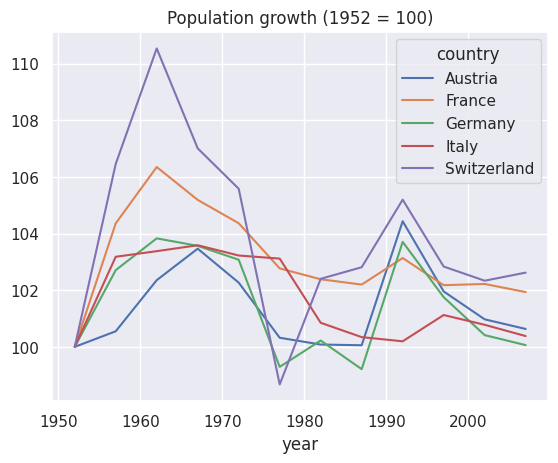

In [77]:
wide.plot.line()
plt.title('Population growth (1952 = 100)')
plt.show()

* Geschafft! Gratulation!